### Instalations / Dev

In [1]:
import whisper
from pytube import YouTube
import gradio as gr
import os

In [2]:
def yt_audio(video_url):
	yt = YouTube(str(video_url))
	video = yt.streams.filter(only_audio=True).first()
	destination = 'Files/'
	audio_file = video.download(output_path=destination)
	base, ext = os.path.splitext(audio_file)
	file_path = base + '.mp3'
	os.rename(audio_file, file_path)
	
	return str(file_path)									# Returns the path of the downloaded audio file

In [6]:
sample_file = yt_audio('https://www.youtube.com/watch?v=9V3L8R5DlNg')

In [3]:
model = whisper.load_model('small')

# There are other models available

# 1. tiny, 2. base, 3. small, 4. medium, 5. large

In [12]:
def trascribe(video_url):
    # generate file path
    file_path = yt_audio('https://www.youtube.com/watch?v=9V3L8R5DlNg')

    # Transcribe audio file
    trascription_dict = model.transcribe(file_path)
    text = trascription_dict['text']
    language = trascription_dict['language']

    return text, language

In [13]:
result_text, result_lang = trascribe('https://www.youtube.com/watch?v=9V3L8R5DlNg')

/Users/olang/opt/miniconda3/envs/nlp/lib/python3.9/site-packages/whisper/transcribe.py:78: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [14]:
print(result_text)

 Twitter says that it has nearly 240 million monetizable daily active users. Millions of those accounts though aren't real. They're bots, spam and fake accounts. And that's something both Twitter and Elon Musk accept. But what they don't agree on is how many accounts are fake, or even what a bot is. Depending on how you define bot, you could have anywhere from less than 1% to 20%. It's a debate that's turned into a $44 billion question as Elon Musk attempts to back out of a deal to buy Twitter. So how many bots are there on Twitter? First of all, Twitter claims that less than 5% of all of its daily active users are bots. Elon Musk though says that figure is nonsense. What do you think it is? What's the, I mean, it's not 5%, what is it? I think it's some number that is probably at least four or five times that number. This is why Elon Musk, at least he claims, is backing out of the deal. He's even accused Twitter of fraud. The center of the disagreement comes down to a definition. What 

In [15]:
print(result_lang)

en


In [ ]:
tiny_model = whisper.load_model('tiny')
base_model = whisper.load_model('base')
small_model = whisper.load_model('small')
medium_model = whisper.load_model('medium')

In [ ]:
def trascribe(model_type ,video_url):

    if model_type == 'tiny':
        model = tiny_model
    elif model_type == 'base':
        model = base_model
    elif model_type == 'small':
        model = small_model
    elif model_type == 'medium':
        model = medium_model
    
    
    file_path = yt_audio('https://www.youtube.com/watch?v=9V3L8R5DlNg')

    trascription_dict = model.transcribe(file_path)
    text = trascription_dict['text']
    language = trascription_dict['language']

    return text, language

In [26]:
demo_app = gr.Interface(
    title = "Youtube video trascription",
    description = "Youtube video trascription using OpenAI's Whisper models \n\n 1. Select Model, \n 2. Pick Youtube video, copy video URL, \n 3. Paste URL in the Youtube Video URL input box and click 'Submit' button",
    fn = trascribe,
    inputs = [  gr.Dropdown(choices=['Tiny', 'Base' ,'Small', 'Medium'], label="Model", default='Base', type = 'str'),
                gr.Textbox(lines=1, placeholder="Youtube Video URL", label="Video URL"),],

    outputs = [ gr.Textbox(placeholder="Transcritpion.", interactive=True, label="Transcription"),
                gr.Text(placeholder="Detected Language.", interactive=False, label="Language"),],
    
    allow_flagging = "never",
)

demo_app.launch(share=False, inbrowser=True)

# Arguments
# 1. share: If True, the app will be shared publicly via ngrok when run. If False, the app will only be accessible locally.
# 2. inbrowser: If True, the app will be opened in a new browser tab. If False, the app will be opened in a new window.


/Users/olang/opt/miniconda3/envs/nlp/lib/python3.9/site-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Dropdown, please remove them: {'default': 'Base'}
  warnings.warn(


Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7fd9df20e9a0>, 'http://127.0.0.1:7870/', None)

-----

# other

In [1]:
text = "Twitter says that it has nearly 240 million monetizable daily active users. Millions of those accounts though aren\'t real. They\'re bots, spam and fake accounts. And that\'s something both Twitter and Elon Musk accept. But what they don\'t agree on is how many accounts are fake, or even what a bot is. Depending on how you define bot, you could have anywhere from less than 1% to 20%. It\'s a debate that\'s turned into a $44 billion question as Elon Musk attempts to back out of a deal to buy Twitter. So how many bots are there on Twitter? First of all, Twitter claims that less than 5% of all of its daily active users are bots. Elon Musk though says that figure is nonsense. What do you think it is? What\'s the, I mean, it\'s not 5%, what is it? I think it\'s some number that is probably at least four or five times that number. This is why Elon Musk, at least he claims, is backing out of the deal. He\'s even accused Twitter of fraud. The center of the disagreement comes down to a definition. What actually is a bot? Michael Carney is founder of Twitter Bot or Not. You could have an account that just tweets out gibberish based on a computer algorithm. But then one time, if that account is tweeted from someone\'s cell phone and a real person making their honest comment on the world, is that a bot account or not? So it\'s not a static thing that exists. Without an agreed on definition, Elon Musk had a go at trying to estimate the number anyway. In his countersuit, his team claimed to use a tool called Botometer and concluded that 33% of all Twitter accounts were bots. The problem is Botometer doesn\'t actually say whether an account is a bot or not, just a score out of five. Five being likely to be a bot, zero unlikely. So where did Elon Musk draw that line? So how to choose this threshold is key to the answer of how many bots are there on the platform. It\'s not clear what Elon Musk\'s team did, right? So to me, they can choose any special they want. Twitter\'s bot claims, though, are also, at the very least, questionable. This is Clayton Davis, one of the researchers who created Botometer. Twitter has slightly conflicting priorities. On one hand, they care about credibility, but they also care about having high user numbers, right? That charge was backed up by Twitter whistleblower and former head of security, Peter Zatko, who claimed that Twitter execs are financially incentivized to count bots as people. This all comes down to how Twitter actually counts its bots, and it\'s way less techy than you might imagine. The chief executive, Parig Agrawal, described in a tweet how they do this. Our estimate is based on multiple human reviews, he said. Elon Musk says that is totally unscientific. And yet the creator and maintainer of Botometer, the tool that Elon Musk is using, thinks that Twitter\'s methodology actually isn\'t that bad. If I were the people in Twitter, I would probably do something similar, right? It\'s just still, to me, how they define those things, it\'s not clear. If they really want to do this, they can sit together so we can say, oh, can we agree on this, this account is bot, this account is human. But Twitter and Elon Musk aren\'t sitting down together. They simply cannot agree how many bots Twitter has. And that\'s the fundamental problem, perhaps no one can."

In [2]:
print(len(text))

3309


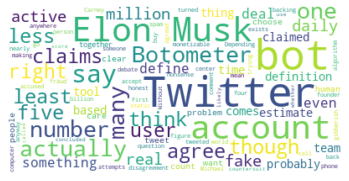

In [15]:
# now we can create a picture based on the text

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", max_font_size=50, max_words=100 ).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

